In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from mountain_goat.preprocessing import create_dataframe

In [9]:
from mountain_goat.main import train_next_move

In [3]:
#importing data
list_videos= create_dataframe('/home/william/code/ar10000/mountain_goat/raw_data/mountain_goat_screenshots')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


> /home/william/code/ar10000/mountain_goat/mountain_goat/preprocessing.py(41)create_dataframe()
     40         framepath_list=[]
---> 41         for frame_index , frame in enumerate(subfolder_vid_paths):
     42             try:



2022-09-02 20:45:47.381572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/william/.pyenv/versions/3.8.12/envs/goat_env/lib/python3.8/site-packages/cv2/../../lib64:
2022-09-02 20:45:47.381743: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-02 20:45:47.381778: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-QOR5S2U2): /proc/driver/nvidia/version does not exist
2022-09-02 20:45:47.382304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler 


✅ model initialized

✅ model compiled

Train model...

✅ model trained (72 rows)


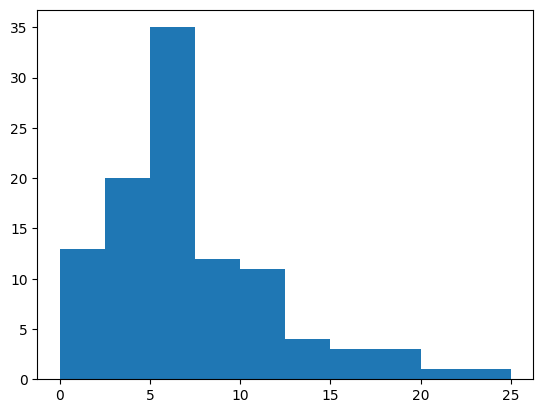

In [10]:
model = train_next_move()

In [4]:
import pandas as pd
import numpy as np
import ipdb
import matplotlib.pyplot as plt

In [ ]:
# b=np.array(list_videos)

In [6]:
def check_nan_videos(videos:list):
    """takes in list of dataframes and returns a summary of the videos w.r.t the number of nan values"""
    vid_summary =[]
    for df in videos:
        num_nans= df['right_hand_x'].isnull().sum(axis=0)
        vid_id = df['frame_id'].to_list()[0]
        percent= num_nans/len(df)
        res= {'vid_id': vid_id, 'num_nans': num_nans, 'percent':percent}
        vid_summary.append(res)
    return pd.DataFrame(vid_summary)

In [7]:
b =check_nan_videos(list_videos)

In [8]:
#removing nan values in videos
list_videos_no_nan=[]
for df in list_videos:
    df.dropna(inplace=True)
    list_videos_no_nan.append(df)

In [9]:
list_videos_no_nan[6]

,left_hand_x,left_hand_y,right_hand_x,right_hand_y,left_foot_X,left_foot_y,right_foot_x,right_foot_y,frame_id
0,0.489430,0.612822,0.499963,0.658861,0.491220,0.759732,0.536898,0.982697,Vid6_frame0
1,0.438768,0.083819,0.534009,0.361121,0.500019,0.753388,0.526962,0.751958,Vid6_frame1
2,0.444831,0.091734,0.458521,0.119625,0.508628,0.761070,0.510873,0.730575,Vid6_frame2


In [ ]:
list_videos_no_nan[1]

In [ ]:
list_videos_no_nan[6]

In [ ]:
list_videos_no_nan[6].iloc[-1:]

In [10]:
y = []
X = []
for df in list_videos_no_nan:
    df = df.drop(columns='frame_id', axis=1)
    #last_index = len(df)-1
    last_frame= df.iloc[-1:]
    frames = df[:-1]
    y.append(np.array(last_frame))
    X.append(np.array(frames))
#     print(counter)

In [11]:
frames_to_plot=[]
for vid in X:
    frames_to_plot.append(vid.shape[0])

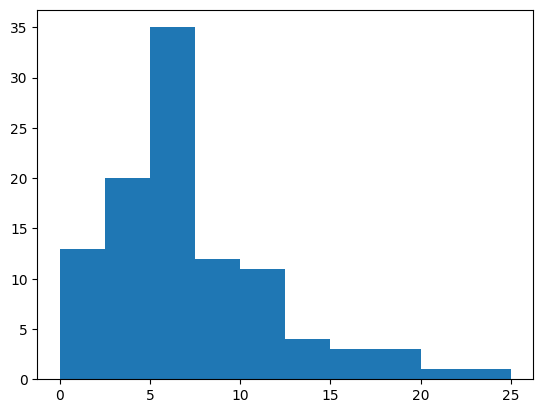

In [12]:
plt.hist(frames_to_plot);

In [15]:
#padding needs to be done
X_pad = pad_sequences(X, dtype='float32', padding='post', value=-1000)

In [16]:
X_pad.shape

(103, 25, 8)

In [17]:
X_pad_test = X_pad[90:,:,:]
X_pad_train= X_pad[:90, :,:]

In [18]:
X_pad_train.shape

(90, 25, 8)

In [14]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.sequence import pad_sequences


2022-09-07 19:13:49.283004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/william/.pyenv/versions/3.8.12/envs/goat_env/lib/python3.8/site-packages/cv2/../../lib64:
2022-09-07 19:13:49.283058: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [45]:
# model architecture 
def initialise():
    """initialize model"""
    #initialize sequential
    model = models.Sequential()
    #adding masking layer
    model.add(layers.Masking(mask_value=-1000))
    #adding rnn layers
    model.add(layers.LSTM(units=20, return_sequences=True))
    model.add(layers.LSTM(units=5, return_sequences=False))
    model.add(layers.Flatten())
    #adding dense layers
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(8, activation='linear'))
    
    return model

In [34]:
def compile_model(model):
    """compile model"""
    model.compile(loss= 'mse',
                  optimizer='adam',
                  metrics=["mae"]
        )
    return model

In [46]:
model = initialise()
model= compile_model(model)


In [30]:
model

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    patience= 20,
    restore_best_weights=True
)

In [ ]:
# k=np.array(y)
k[0]

In [ ]:
len(y)

In [24]:
new_y = np.vstack(y)
    

In [41]:
y_train=new_y[:90, :]
y_test= new_y[90:, :]
print(y_test.shape)
y_train.shape

(12, 8)


(90, 8)

In [40]:
X_pad_train.shape

(90, 25, 8)

In [47]:
history =model.fit(
    X_pad_train,
    y_train,
    epochs= 500,
    validation_split=0.3,
    callbacks=[es],
    batch_size= 32,
    verbose = 1,
        )

Epoch 1/500
2/2 [==============================] - 50s 9s/step - loss: 0.2325 - mae: 0.4421 - val_loss: 0.2112 - val_mae: 0.4132
Epoch 2/500
2/2 [==============================] - 1s 444ms/step - loss: 0.2248 - mae: 0.4339 - val_loss: 0.2027 - val_mae: 0.4032
Epoch 3/500
2/2 [==============================] - 1s 467ms/step - loss: 0.2166 - mae: 0.4248 - val_loss: 0.1940 - val_mae: 0.3923
Epoch 4/500
2/2 [==============================] - 1s 428ms/step - loss: 0.2080 - mae: 0.4154 - val_loss: 0.1850 - val_mae: 0.3812
Epoch 5/500
2/2 [==============================] - 1s 464ms/step - loss: 0.1993 - mae: 0.4056 - val_loss: 0.1760 - val_mae: 0.3700
Epoch 6/500
2/2 [==============================] - 1s 347ms/step - loss: 0.1899 - mae: 0.3947 - val_loss: 0.1670 - val_mae: 0.3589
Epoch 7/500
2/2 [==============================] - 1s 401ms/step - loss: 0.1810 - mae: 0.3840 - val_loss: 0.1579 - val_mae: 0.3472
Epoch 8/500
2/2 [==============================] - 1s 389ms/step - loss: 0.1718 - mae

In [49]:

X_pad_test.shape

(13, 25, 8)

In [ ]:
y_test.shape

In [48]:
model.evaluate(X_pad_test[:-1,:,:], y_test)

1/1 [==============================] - 0s 101ms/step - loss: 0.0221 - mae: 0.1096


[0.022096240893006325, 0.1096249595284462]